In [2]:
library('igraph')
library('Matrix')
library('pracma')

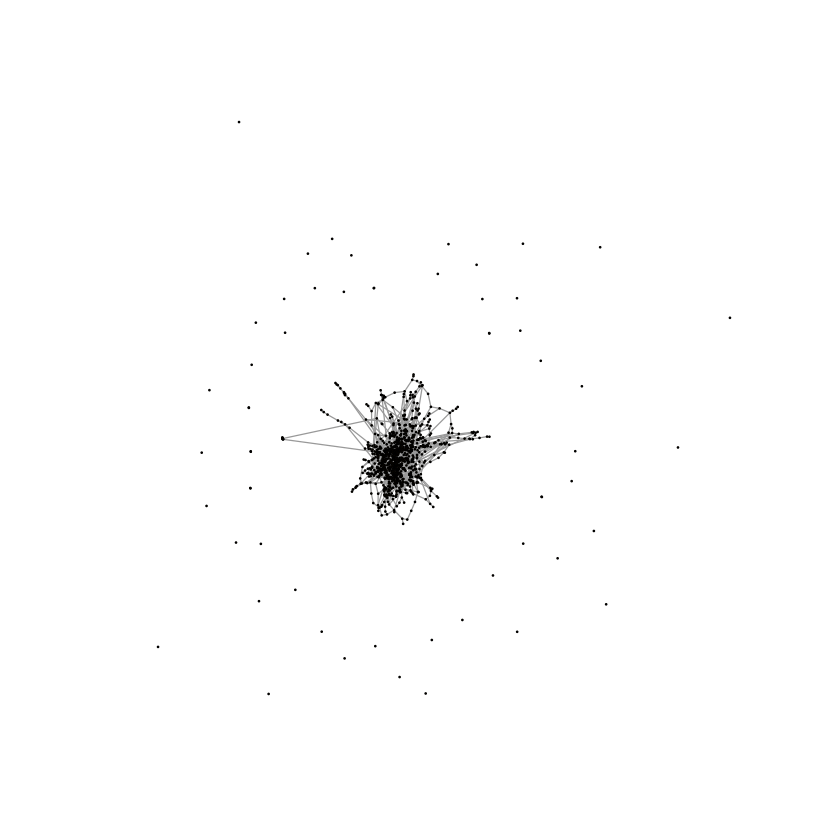

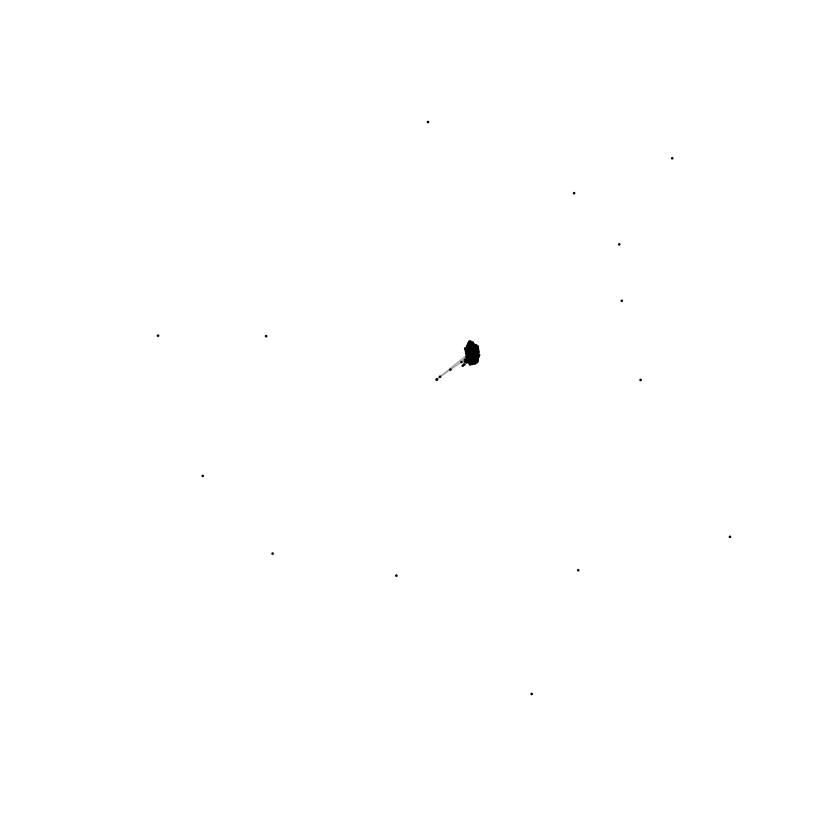

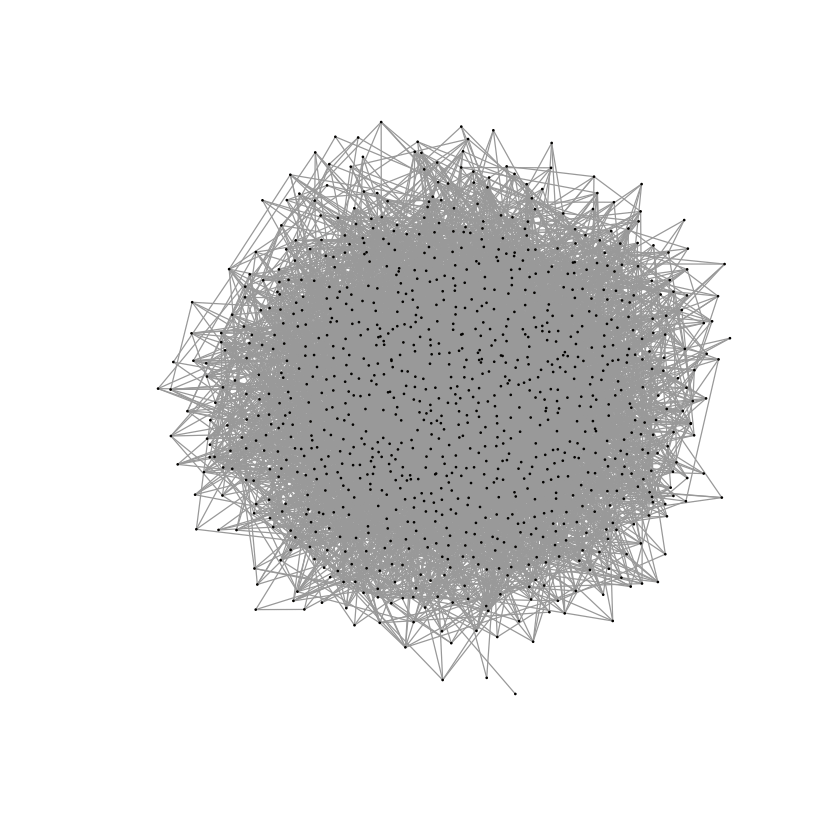

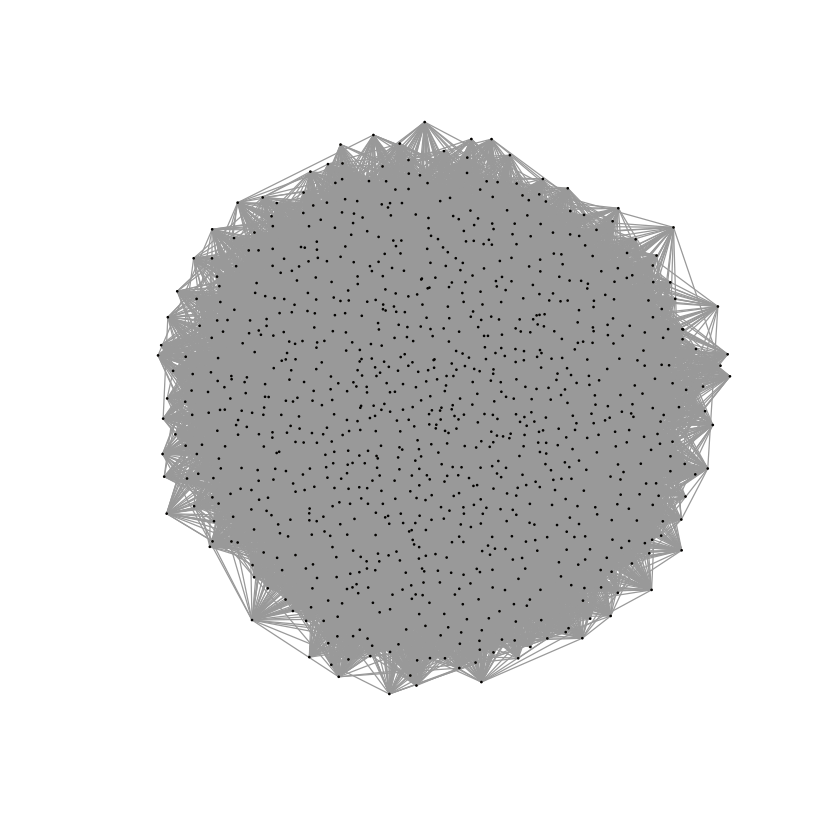

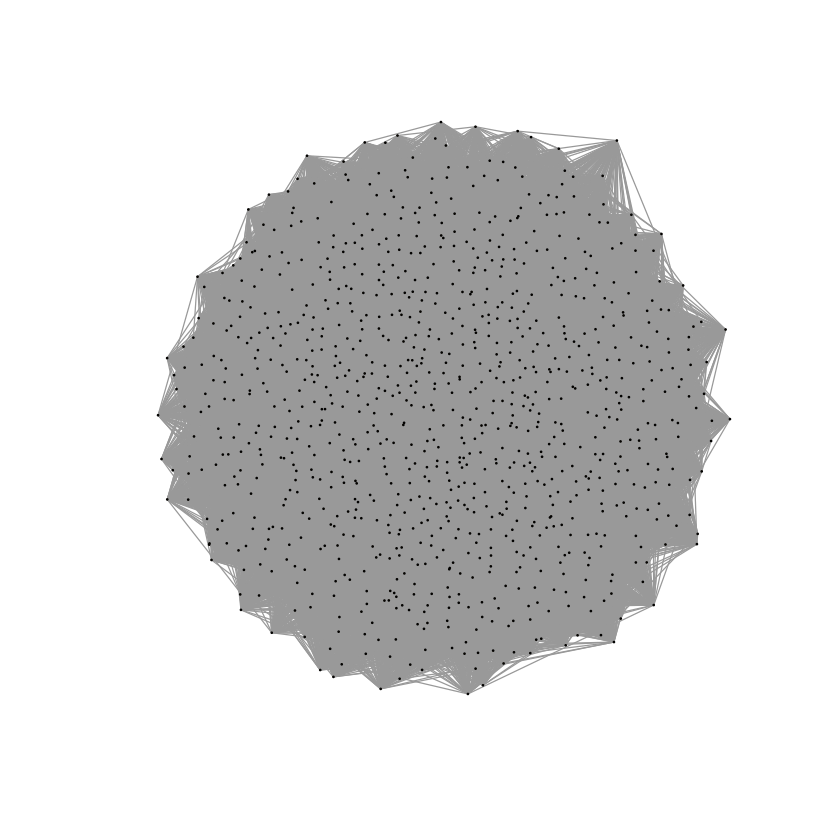

In [19]:
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    plot(g,vertex.size=0.5, vertex.label.cex=0.001)
}

In [26]:
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    print(diameter(g, directed = F, unconnected = TRUE))
}

[1] 15
[1] 11
[1] 5
[1] 3
[1] 3


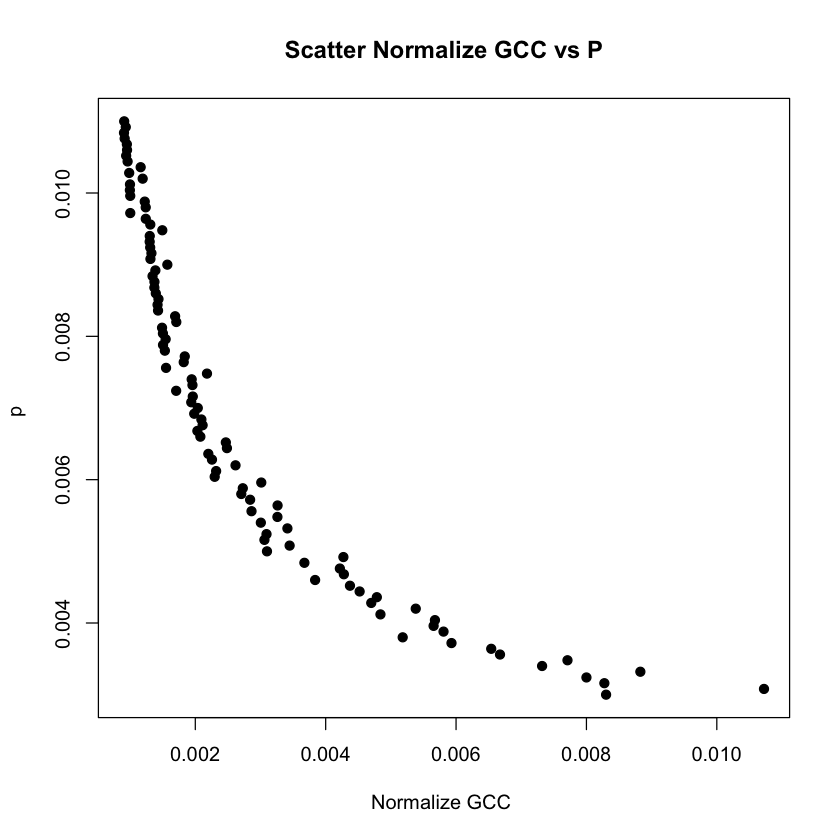

In [4]:
res_gcc = c() 
prob = seq(0.003,0.011,0.00008)
for (i in 1:101){
    prob_c = prob[i]
    g <- erdos.renyi.game(1000, prob_c, directed=F)
    frac <- diameter(g, directed = F, unconnected = TRUE)/gsize(g)
    res_gcc[i] <- frac
}

plot(res_gcc, prob, main="Scatter Normalize GCC vs P", xlab="Normalize GCC ", ylab="p ", pch=19)

[1]    1 9901
[1]    1 9901


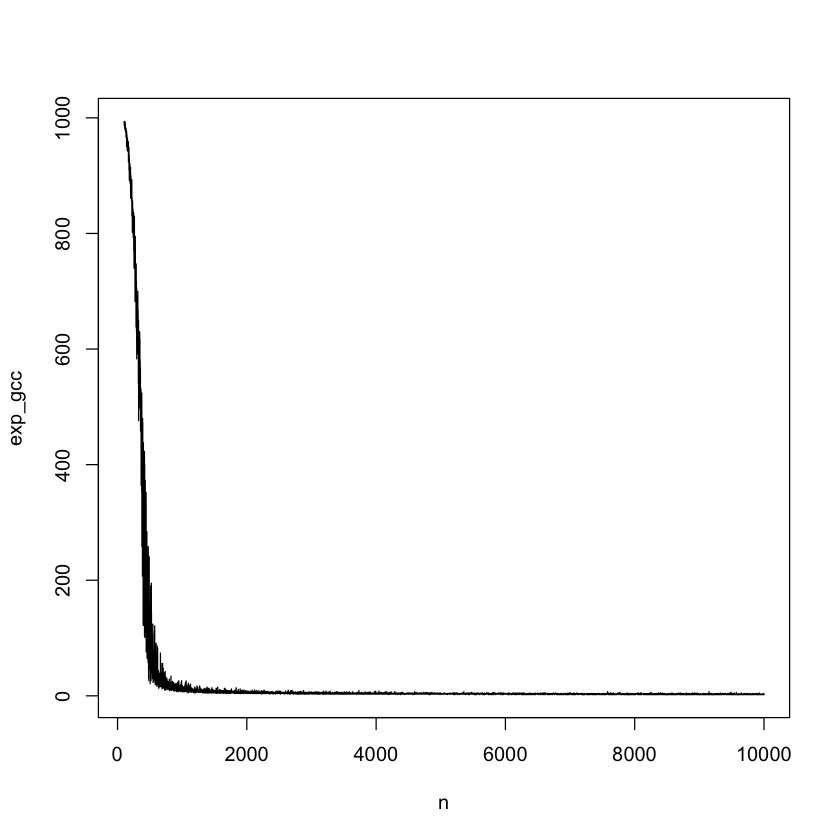

In [22]:
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 0.5/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')


[1]    1 9901
[1]    1 9901


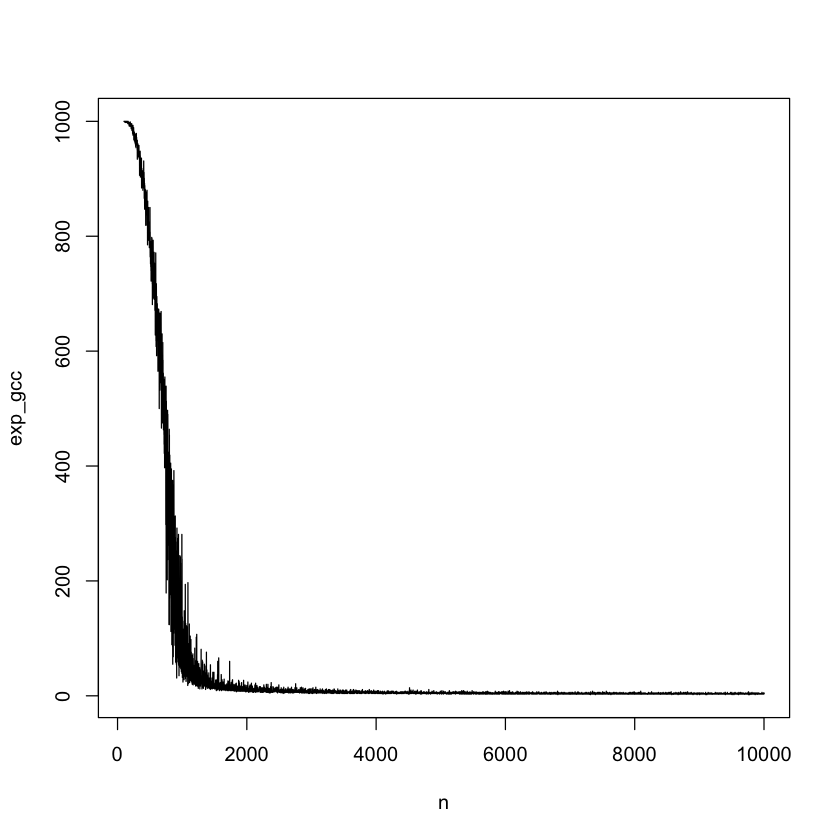

In [23]:
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 1/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')

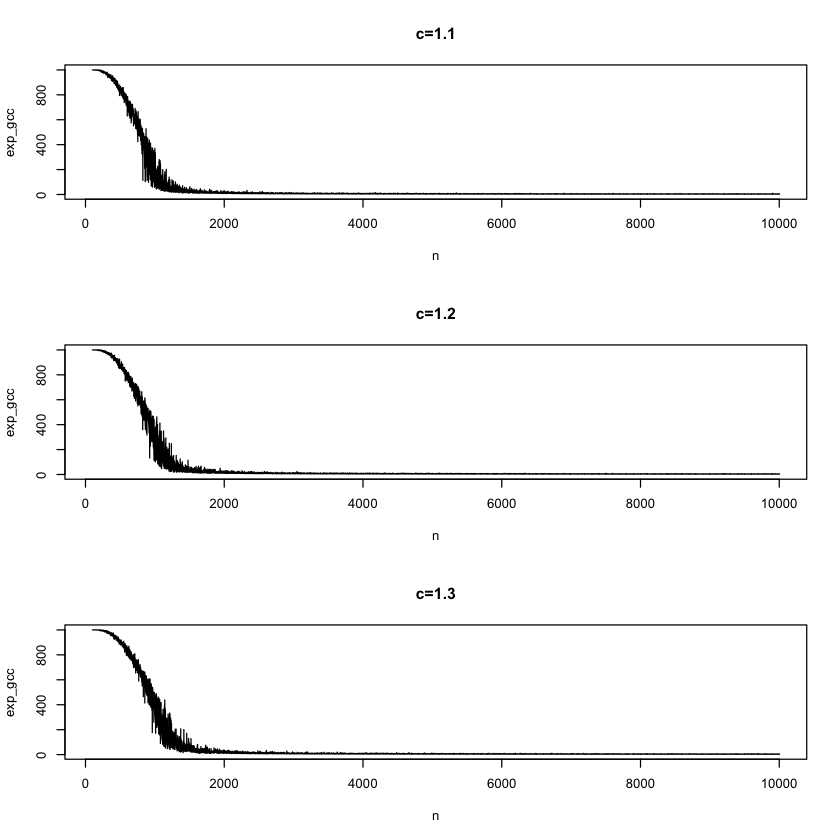

In [31]:
library(plotly)

par(mfrow=c(3,1)) 
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.1/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.1")

exp_gcc <- c()
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.2/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.2")

exp_gcc <- c()
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.3/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.3")


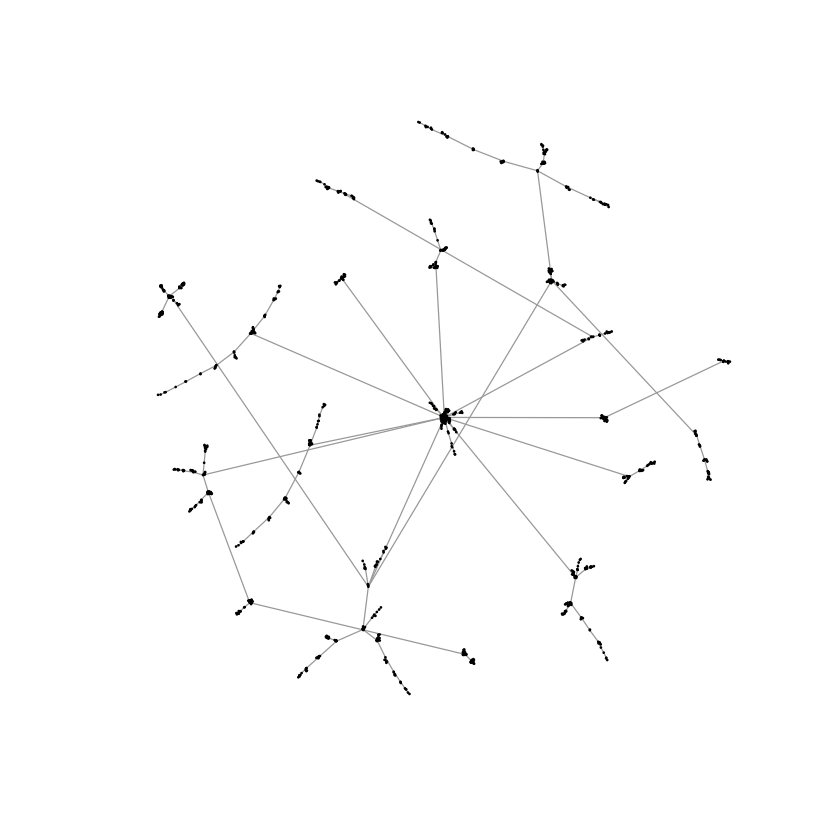

In [4]:
g <- barabasi.game(1000, m=1, directed=F)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)

In [9]:
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.928968

In [10]:
g <- barabasi.game(10000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.9777157

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“15 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“45 y values <= 0 omitted from logarithmic plot”

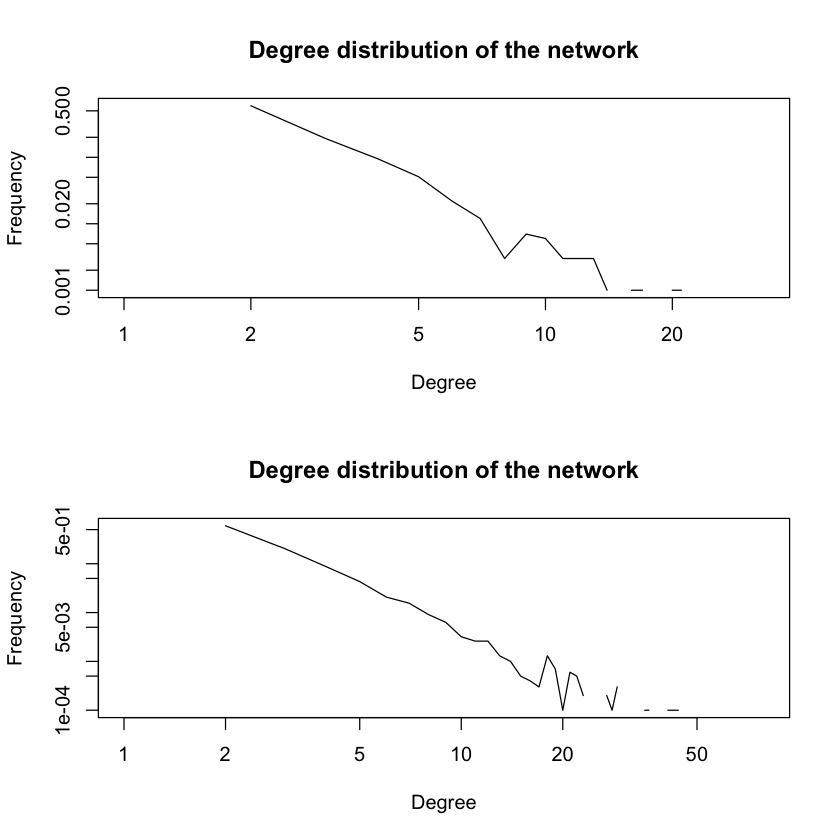

In [14]:
par(mfrow=c(2,1))

g <- barabasi.game(1000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

g <- barabasi.game(10000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
